In [43]:
import warnings

import pybamm
import matplotlib.pyplot as plt
import numpy as np

warnings.simplefilter('ignore')

In [32]:
from fileinput import filename


options = {
    'operating mode': 'current'
    }
chemistry = pybamm.parameter_sets.Chen2020
parameters = pybamm.ParameterValues()# chemistry=chemistry)
parameters.read_parameters_csv(filename="../data/parameters.csv")

parameters.update(
    {
        "Cation transference number": 1.0,
    },
    check_already_exists=False,
)

experiment = pybamm.Experiment(
    [
        (
            "Discharge at C/10 for 10 hours or until 3.5 V",
            "Rest for 1 hour",
            "Charge at 1 A until 4.1 V",
            "Hold at 4.1 V until 50 mA",
            "Rest for 1 hour"),
    ]
)
model = pybamm.lithium_ion.DFN(options=options)
sim = pybamm.Simulation(model=model, experiment=experiment, parameter_values=parameters)
sim.solve()

TypeError: ParameterValues.__init__() missing 1 required positional argument: 'values'

In [3]:
terminal_voltage = sim.solution['Terminal voltage [V]'].entries
current_density = sim.solution["Current collector current density [A.m-2]"].entries
time = sim.solution["Time [h]"].entries
pos_ocp = sim.solution["X-averaged positive electrode open circuit potential [V]"].entries
neg_ocp = sim.solution["X-averaged negative electrode open circuit potential [V]"].entries


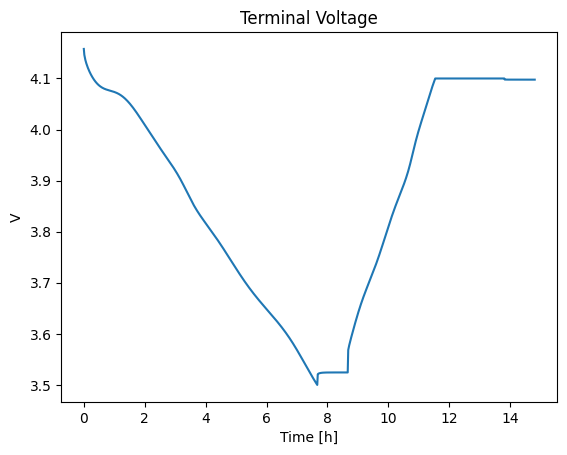

In [4]:
plt.plot(time, terminal_voltage)
plt.xlabel("Time [h]")
plt.ylabel("V")
plt.title("Terminal Voltage")
plt.show()

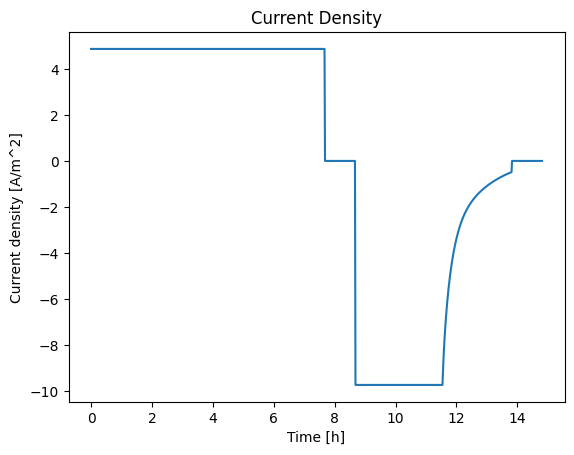

In [5]:
plt.plot(time, current_density)
plt.xlabel("Time [h]")
plt.ylabel(r'Current density [A/m^2]')
plt.title("Current Density")
plt.show()

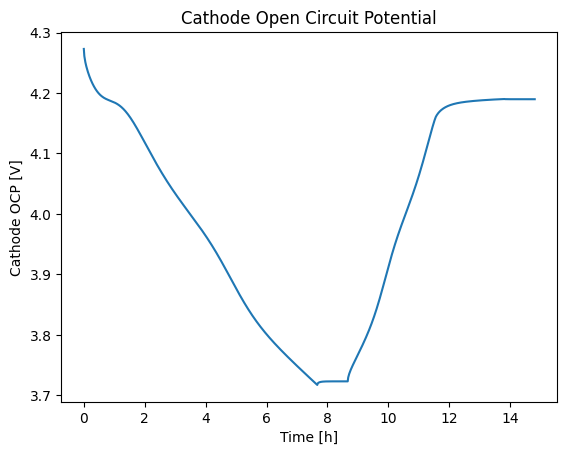

In [6]:
plt.plot(time, pos_ocp)
plt.xlabel("Time [h]")
plt.ylabel(r'Cathode OCP [V]')
plt.title("Cathode Open Circuit Potential")
plt.show()

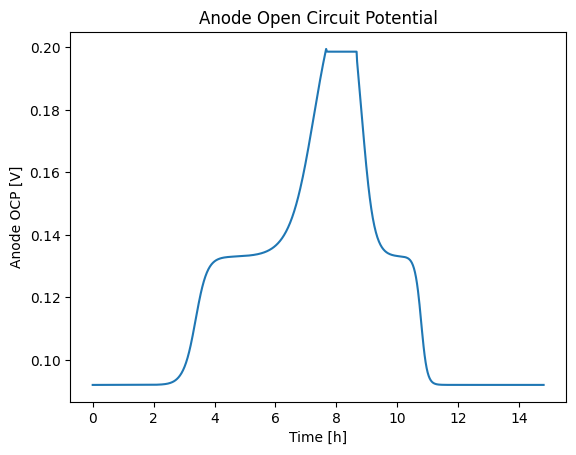

In [7]:
plt.plot(time, neg_ocp)
plt.xlabel("Time [h]")
plt.ylabel(r'Anode OCP [V]')
plt.title("Anode Open Circuit Potential")
plt.show()

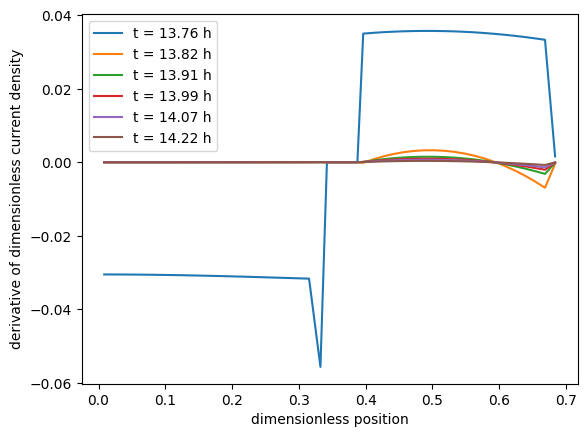

In [8]:
pos_current_density = sim.solution['Electrolyte current density'].entries
x_position = sim.solution['x [m]'].entries
t_min = 13.75
t_max = 14.25

time_ids = np.where(np.less_equal(time, t_max) & np.greater_equal(time, t_min))[0]
time_range = time[time_ids]
current_density_for_time_range = pos_current_density[:, time_ids]
position = np.zeros(61)
position[:60] = x_position[:, 0]
position[60] = 0.0002500
non_dim_position = position / 0.0002500

for id in [0, 5, 10, 15, 20, 29]:
    time = time_range[id]
    current_density_vals = current_density_for_time_range[:, id]
    derivative_curr_density = np.divide(current_density_vals[1:] - current_density_vals[:-1], non_dim_position[1:] - non_dim_position[:-1])
    plt.plot(non_dim_position[:-1], derivative_curr_density, label='t = {} h'.format(round(time, 2)))
plt.legend()
plt.xlabel('dimensionless position')
plt.ylabel("derivative of dimensionless current density")
plt.show()

In [44]:
def ocv(sod, L=1, k=2):
    return 2.5 + (1/k) * np.log((L - sod) / sod)

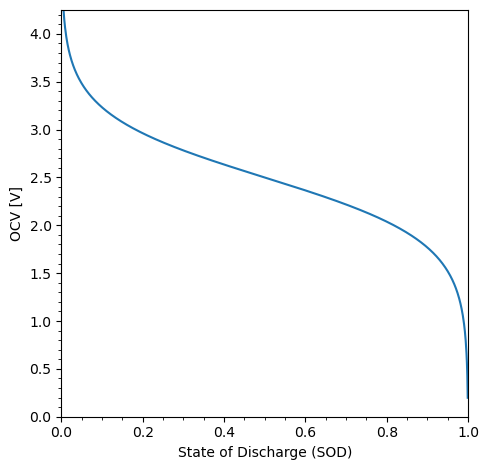

In [47]:
sods = np.linspace(0, 1, num=1000)
fig, ax = plt.subplots()
ax.plot(sods, ocv(sods, k=3))
ax.set_ylim([0, 4.25]);
ax.set_xlim([0, 1]);
ax.set_box_aspect(1);
ax.set_xlabel('State of Discharge (SOD)');
ax.set_ylabel('OCV [V]');
ax.minorticks_on();
plt.tight_layout();